## Want to explore different loan types

In [95]:
import os
import pandas as pd 
import glob
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
os.listdir()

['Well_Being.ipynb',
 'info.pdf',
 '.DS_Store',
 'Exploration_LoanInformalGroup_Ella.ipynb',
 'different_loan_types_julia.ipynb',
 'Demographics_Education_Julia.ipynb',
 'Demo_Individual.ipynb',
 'House Ownership.ipynb',
 'diaries_transactions_all.csv',
 'consumption_julia.ipynb',
 'Exploration_LoanP2P_Ella.ipynb',
 'README.md',
 'Goings-On.ipynb',
 '.gitignore',
 'Exploration_Ella.ipynb',
 '.ipynb_checkpoints',
 '.git',
 'Exploration_Loan_Ella.ipynb',
 'initial_exploration_julia.ipynb',
 'aux_data']

In [3]:
trx = pd.read_csv('diaries_transactions_all.csv', low_memory=False)

In [4]:
pd.set_option('display.max_columns',200)

In [5]:
trx.shape

(483949, 58)

In [6]:
trx.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

## Account questions: 

### How many accounts are there? 

In [7]:
len(trx.account_ids.unique())

9547

Is this the same as unique_accounts ? 

In [8]:
trx.unique_accnts.value_counts()

1.0    9546
Name: unique_accnts, dtype: int64

Yup. 

### Account types?

In [9]:
trx.account_bsheet_desig.value_counts()

Asset        52021
Liability    23078
Insurance     1971
Name: account_bsheet_desig, dtype: int64

### How many unique liabilities accounts, e.g. loans?  

In [10]:
trx.loc[trx['unique_accnts']==1].shape

(9546, 58)

In [11]:
trx.loc[trx['unique_accnts']==1].account_bsheet_desig.value_counts()

Asset        2828
Liability    1906
Insurance     254
Name: account_bsheet_desig, dtype: int64

1906 loans in total to work with. 

### How many of these accounts are formal? 

In [12]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].account_formal.value_counts()

Informal    1691
Formal       215
Name: account_formal, dtype: int64

### What kinds of transactions are happening with liabilities? 

In [13]:
trx.loc[trx['account_bsheet_desig']=="Liability"].trx_family_code.value_counts()

INFP2P     14755
SUPPCRD     4050
FRMLN       1429
INFGRP      1377
ARREARS     1058
ADVANCE      280
EMPLN        111
PAWN          16
OTHER          2
Name: trx_family_code, dtype: int64

In [14]:
trx.loc[trx['account_bsheet_desig']=="Liability"].trx_family_desc.value_counts()

Informal P2P                              14755
Supplier credit                            4050
Formal loan                                1429
Informal group                             1377
Arrears owed to or owed by respondents     1058
Advance                                     280
Loan from employer                          111
Pawning assets                               16
Other                                         2
Name: trx_family_desc, dtype: int64

### What transactions are in "informal" loan categories, and which are in the "formal" categories? 

In [15]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].trx_family_desc.value_counts()

Supplier credit    2973
Formal loan        1276
Other                 2
Name: trx_family_desc, dtype: int64

In [16]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Informal"].trx_family_desc.value_counts()

Informal P2P                              14755
Informal group                             1377
Supplier credit                            1077
Arrears owed to or owed by respondents     1058
Advance                                     280
Formal loan                                 153
Loan from employer                          111
Pawning assets                               16
Name: trx_family_desc, dtype: int64

### How many closing balances of a formal loan are recorded? 

In [17]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].account_startclose_balance.value_counts()


Close    201
Start     77
Name: account_startclose_balance, dtype: int64

### For those listed as a closing balance, how many are zero? 

In [18]:
trx.loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=="Formal"].loc[trx['account_startclose_balance']=='Close'].trx_value_kes.value_counts().head()


0.0       114
20.0        5
50.0        4
10.0        4
1075.0      2
Name: trx_value_kes, dtype: int64

### What is the average number of days these liability accounts are observed? 

All liabilities: 

In [19]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].tot_acc_daysofobs.mean()

221.24186778593915

Formal liabilities: 

In [20]:
trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"].loc[trx['account_formal']=='Formal'].tot_acc_daysofobs.mean()

236.05116279069767

### For all of the loans, how many unique HH IDs are there, and how many unique owners are there? 

In [28]:
unique_loans = trx.loc[trx['unique_accnts']==1].loc[trx['account_bsheet_desig']=="Liability"]

In [26]:
len(unique_loans.hh_ids.unique())

291

In [27]:
len(unique_loans.m_ids_owner.unique())

436

## What do different loan types look like in terms of data? 

### Formal Liabilities: FRMLN

In [33]:
unique_loans.loc[trx['account_formal']=='Formal'].trx_family_code.value_counts()

FRMLN      133
SUPPCRD     82
Name: trx_family_code, dtype: int64

In [34]:
unique_loans.loc[trx['account_formal']=='Formal'].trx_family_desc.value_counts()

Formal loan        133
Supplier credit     82
Name: trx_family_desc, dtype: int64

In [112]:
random.seed(1)
a = random.choice(unique_loans.loc[trx['trx_family_code']=='FRMLN']["account_ids"].unique())

In [113]:
FRMLNa = trx[trx["account_ids"]==a]

In [114]:
FRMLNa = FRMLNa.copy()

In [82]:
FRMLNa.sort_values("trx_stdtime_days_acc", inplace=True)

In [85]:
for index, row in FRMLNa.iterrows():
    if FRMLNa.loc[index,"trx_bsheet_direction"]=="Increase":
        FRMLNa.at[index,"trx_val_dir"] = FRMLNa.loc[index,"trx_value_kes"]
    elif FRMLNa.loc[index,"trx_bsheet_direction"]=="Decrease":
        FRMLNa.at[index,"trx_val_dir"] = -FRMLNa.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + index)

In [86]:
FRMLNa[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
8312,0,38000.0,1. Starting balance (today),NaN,Increase,38000.0
5456,18,3400.0,3. Payments,Outflow,Decrease,-3400.0
13411,19,304.0,4. Any known fees,NaN,Increase,304.0
6497,49,3400.0,3. Payments,Outflow,Decrease,-3400.0
17163,49,270.0,3. Payments,Outflow,Decrease,-270.0
4513,80,3400.0,3. Payments,Outflow,Decrease,-3400.0
19338,80,270.0,3. Payments,Outflow,Decrease,-270.0
454057,112,3400.0,3. Payments,Outflow,Decrease,-3400.0
438450,139,2100.0,3. Payments,Outflow,Decrease,-2100.0
438564,170,2100.0,3. Payments,Outflow,Decrease,-2100.0


In [90]:
FRMLNa.insert(59,"bal_evol",np.zeros(FRMLNa.shape[0]))

In [91]:
s=0
for index,row in FRMLNa.iterrows():
    s+=FRMLNa.loc[index,"trx_val_dir"]
    FRMLNa.at[index,"bal_evol"]=s

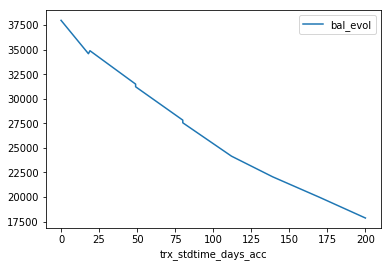

In [96]:
FRMLNa.plot(x="trx_stdtime_days_acc",y="bal_evol")

#### FRMLN types: 

In [122]:
FRMLN_df = unique_loans.loc[trx['trx_family_code']=='FRMLN']

In [124]:
FRMLN_df.shape

(159, 58)

In [129]:
FRMLN_df.trx_type_code.value_counts()

2760    48
2762    33
3398    24
3247    21
4219    14
3397    12
2761     2
2746     2
3502     2
2759     1
Name: trx_type_code, dtype: int64

In [130]:
FRMLN_df.trx_type_desc.value_counts()

Individual Business or Agriculture Loan      48
Consumer/ personal loan (not payday loan)    33
Hire Purchase                                24
Joint liability loan                         21
M-SHWARI Loan                                14
School Fees Loan                             12
Group Enterprise Loan                         2
Credit card (including store card)            2
Payday loan                                   2
Student loan                                  1
Name: trx_type_desc, dtype: int64

### Formal loan types: 

In [142]:
FRMLN_2760_df = trx.loc[trx['trx_type_code']==2760]

In [143]:
random.seed(2)
a = random.choice(FRMLN_2760_df["account_ids"].unique())

In [144]:
FRMLN_2760_dfa = FRMLN_2760_df[FRMLN_2760_df['account_ids']==a ]

In [145]:
FRMLN_2760_dfa = FRMLN_2760_dfa.copy()

In [146]:
FRMLN_2760_dfa.sort_values("trx_stdtime_days_acc", inplace=True)

In [151]:
FRMLN_2760_dfa

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
936,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,06jun2013,6,2013,2013_06,31aug2012,105137049319900000,1.0,56134397318700000,NaN,Liability,Start,Formal,NaN,01may2013,02oct2013,154,5,105137049360200000,56134397318700000,01may2013,5,2013,2013_05,10.0,242,8,0,0,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,298000.0,3505.8820,0,NaN,NaN,NaN,8.344828,298000.0
434478,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,06jun2013,6,2013,2013_06,31aug2012,105137049319900000,NaN,56134397318700000,NaN,Liability,NaN,Formal,NaN,01may2013,02oct2013,154,5,105137049372000000,56134397318700000,31may2013,5,2013,2013_05,10.0,272,9,30,1,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,3.0,"Transfer into bank, SACCO, or MFI account",0.0,8.651168,"01=Bank, MFI, SACCO, insurance branch",Outflow,11098.0,130.5647,0,NaN,NaN,NaN,9.379311,-11098.0
113491,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,24jul2013,7,2013,2013_07,31aug2012,105137049319900000,NaN,56134397318700000,NaN,Liability,NaN,Formal,NaN,01may2013,02oct2013,154,5,105137474456700000,56134397318700000,22jul2013,7,2013,2013_07,13.0,324,11,82,2,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,3.0,"Transfer into bank, SACCO, or MFI account",1.0,0.000000,"12=Other institution (school, clinic, church)",Outflow,11098.0,130.5647,0,NaN,NaN,NaN,11.172410,-11098.0
450879,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,03sep2013,9,2013,2013_09,31aug2012,105137049319900000,NaN,56134397318700000,NaN,Liability,NaN,Formal,NaN,01may2013,02oct2013,154,5,105137821353700000,56134397318700000,15aug2013,8,2013,2013_08,15.0,348,12,106,3,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,3.0,"Transfer into bank, SACCO, or MFI account",0.0,245.429700,"12=Other institution (school, clinic, church)",Outflow,11098.0,130.5647,0,NaN,NaN,NaN,12.000000,-11098.0
447761,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,03sep2013,9,2013,2013_09,31aug2012,105137049319900000,NaN,56134397318700000,NaN,Liability,NaN,Formal,NaN,01may2013,02oct2013,154,5,105137821406600000,56134397318700000,02sep2013,9,2013,2013_09,15.0,366,12,124,4,findev,"Borrowing, lending, savings or insurance media...",FRMLN,Formal loan,2760,Individual Business or Agriculture Loan,3. Payments,Repayment on financial liability,0.0,Decrease,3.0,"Transfer into bank, SACCO, or MFI account",0.0,245.429700,"12=Other institution (school, clinic, church)",Outflow,11098.0,130.5647,0,NaN,NaN,NaN,12.620690,-11098.0
3193,KELDK38,NaN,01sep2012,22oct2013,416,14,04=Diaries Interview,02oct2013,10

In [150]:
for index, row in FRMLN_2760_dfa.iterrows():
    if FRMLN_2760_dfa.loc[index,"trx_bsheet_direction"]=="Increase":
        FRMLN_2760_dfa.at[index,"trx_val_dir"] = FRMLN_2760_dfa.loc[index,"trx_value_kes"]
    elif FRMLN_2760_dfa.loc[index,"trx_bsheet_direction"]=="Decrease":
        FRMLN_2760_dfa.at[index,"trx_val_dir"] = -FRMLN_2760_dfa.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index3193


In [153]:
FRMLN_2760_dfa[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
936,0,298000.0,1. Starting balance (today),NaN,Increase,298000.0
434478,30,11098.0,3. Payments,Outflow,Decrease,-11098.0
113491,82,11098.0,3. Payments,Outflow,Decrease,-11098.0
450879,106,11098.0,3. Payments,Outflow,Decrease,-11098.0
447761,124,11098.0,3. Payments,Outflow,Decrease,-11098.0
3193,154,253608.0,6. Closing Balance--End of last DQ,NaN,NaN,NaN


In [154]:
FRMLN_2760_dfa.insert(59,"bal_evol",np.zeros(FRMLN_2760_dfa.shape[0]))

In [155]:
s=0
for index,row in FRMLN_2760_dfa.iterrows():
    s+=FRMLN_2760_dfa.loc[index,"trx_val_dir"]
    FRMLN_2760_dfa.at[index,"bal_evol"]=s

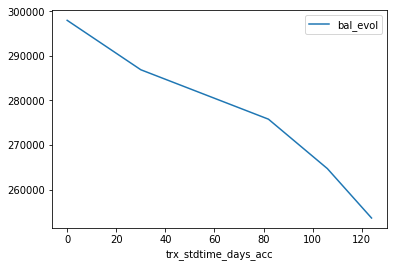

In [156]:
FRMLN_2760_dfa.plot(x="trx_stdtime_days_acc",y="bal_evol")

### What is the average amount of the opening balance of these loans? 

In [157]:
FRMLN_2760_df.shape

(442, 58)

In [159]:
len(FRMLN_2760_df.account_ids.unique())

48

In [209]:
account_id = FRMLN_2760_df.account_ids.unique()[0]

In [215]:
FRMLN_2760_account_df = FRMLN_2760_df.loc[FRMLN_2760_df['account_ids']==account_id].loc[FRMLN_2760_df['trx_prx_purpose']=='1. Starting balance (today)']

In [220]:
FRMLN_2760_account_df['trx_value_kes'].values

array([], dtype=float64)

In [246]:
starting_balances = []

In [247]:
for account_id in FRMLN_2760_df.account_ids.unique(): 
    FRMLN_2760_account_df = FRMLN_2760_df.loc[FRMLN_2760_df['account_ids']==account_id].loc[FRMLN_2760_df['trx_prx_purpose']=='1. Starting balance (today)']
    starting_balance = FRMLN_2760_account_df['trx_value_kes'].values
    if len(starting_balance)>0: 
        starting_balances.append(starting_balance[0])
#         starting_balances.append((account_id, starting_balance[0]))


In [250]:
starting_balances

[18000.0,
 18870.0,
 298000.0,
 0.0,
 5450.0,
 41000.0,
 0.0,
 0.0,
 23000.0,
 4300.0,
 3500.0,
 126450.0,
 12000.0,
 0.0,
 148609.0,
 0.0,
 16000.0,
 116000.0,
 40340.0,
 338847.0,
 16400.0,
 1700.0,
 20000.0,
 88000.0,
 9500.0,
 100000.0,
 108000.0,
 341850.0,
 45000.0]

In [251]:
pd.Series(starting_balances).describe()

count        29.000000
mean      66924.689655
std       99874.452584
min           0.000000
25%        4300.000000
50%       18870.000000
75%      100000.000000
max      341850.000000
dtype: float64

In [261]:
starting_balances = []

In [262]:
for account_id in FRMLN_2760_df.account_ids.unique(): 
    FRMLN_2760_account_df = FRMLN_2760_df.loc[FRMLN_2760_df['account_ids']==account_id].loc[(FRMLN_2760_df['trx_prx_purpose']=='1. Starting balance (today)') | (FRMLN_2760_df['trx_prx_purpose']=='2. New borrowing')]
    starting_balance = FRMLN_2760_account_df['trx_value_kes'].values
    if len(starting_balance)>0: 
        starting_balances.append(starting_balance[0])
#         starting_balances.append((account_id, starting_balance[0]))


In [264]:
starting_balances

[100000.0,
 18000.0,
 18870.0,
 298000.0,
 50000.0,
 0.0,
 5450.0,
 41000.0,
 0.0,
 78600.0,
 0.0,
 23000.0,
 4300.0,
 9500.0,
 3500.0,
 126450.0,
 12000.0,
 0.0,
 218000.0,
 20000.0,
 148609.0,
 6000.0,
 0.0,
 16000.0,
 116000.0,
 40340.0,
 6300.0,
 338847.0,
 16400.0,
 3300.0,
 1700.0,
 20000.0,
 88000.0,
 9500.0,
 100000.0,
 6500.0,
 100000.0,
 1200.0,
 5000.0,
 108000.0,
 341850.0,
 150000.0,
 6300.0,
 35000.0,
 45000.0,
 7300.0]

In [263]:
starting_balances=starting_balances[starting_balances>0]

TypeError: '>' not supported between instances of 'list' and 'int'

In [265]:
pd.Series(starting_balances).describe()

count        46.000000
mean      59648.173913
std       87710.094483
min           0.000000
25%        5587.500000
50%       18435.000000
75%       97000.000000
max      341850.000000
dtype: float64

In [245]:
trx[trx['account_ids']=="59134726342000000"].sort_values('trx_stdtime_days_acc')[['trx_stdtime_days_acc', 'trx_value_kes', 'trx_bsheet_direction', 'trx_prx_purpose', 'account_bsheet_desig', 'trx_direction']]

,trx_stdtime_days_acc,trx_value_kes,trx_bsheet_direction,trx_prx_purpose,account_bsheet_desig,trx_direction
238132,0,500.0,Decrease,3. Payments,Liability,Outflow
22651,3,0.0,Increase,1. Starting balance (today),Liability,NaN
208302,29,500.0,Decrease,3. Payments,Liability,Outflow
247140,56,500.0,Decrease,3. Payments,Liability,Outflow
113772,61,300.0,Decrease,3. Payments,Liability,Outflow
197066,109,1000.0,Decrease,3. Payments,Liability,Outflow
213916,109,6300.0,Increase,2. New borrowing,Liability,Inflow
112538,147,500.0,Decrease,3. Payments,Liability,Outflow
212320,182,100.0,Decrease,3. Payments,Liability,Outflow
278108,218,300.0,Decrease,3. Payments,Liability,Outflow


In [243]:
trx[trx['account_ids']=="59134666467600000"].sort_values('trx_stdtime_days_acc')[['trx_stdtime_days_acc', 'trx_value_kes', 'trx_bsheet_direction', 'trx_prx_purpose']]

,trx_stdtime_days_acc,trx_value_kes,trx_bsheet_direction,trx_prx_purpose
2981,0,0.0,Increase,1. Starting balance (today)
3263,35,0.0,Increase,1. Starting balance (today)
347299,39,2800.0,Decrease,3. Payments
177978,59,9625.0,Increase,2. New borrowing
259048,85,500.0,Decrease,3. Payments
383852,106,300.0,Decrease,3. Payments
275936,127,200.0,Decrease,3. Payments
267186,134,500.0,Decrease,3. Payments
61689,164,100.0,Decrease,3. Payments
88092,171,50.0,Decrease,3. Payments


### Formal Liabilities: SUPPCRD

In [115]:
random.seed(2)
a = random.choice(unique_loans.loc[trx['trx_family_code']=='SUPPCRD']["account_ids"].unique())

In [116]:
unique_suppcrd_trx = unique_loans.loc[trx['trx_family_code']=='SUPPCRD']["account_ids"].unique()

In [134]:
unique_loans.loc[trx['trx_family_code']=='SUPPCRD'].trx_value_kes.describe()

count      149.000000
mean      1001.402685
std       2694.013273
min          0.000000
25%          9.000000
50%         50.000000
75%       1000.000000
max      20440.000000
Name: trx_value_kes, dtype: float64

In [117]:
SUPPCRDa = trx[trx["account_ids"]==a]

In [118]:
SUPPCRDa = SUPPCRDa.copy()

In [135]:
SUPPCRDa.head(3)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
3820,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,18mar2013,3,2013,2013_03,27aug2012,59135274677100000,1.0,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136359710700000,59134363516700000,16mar2013,3,2013,2013_03,7.0,194,6,0,0,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,New airtime on credit/new borrowing,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,18.0,0.211765,0,NaN,NaN,NaN,6.689655
3821,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,18mar2013,3,2013,2013_03,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136359730000000,59134363516700000,16mar2013,3,2013,2013_03,7.0,194,6,0,0,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,Fee for using service (10% of repayment),NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,2.0,0.023529,0,NaN,NaN,NaN,6.689655
10647,KVIHC31,NaN,03sep2012,25sep2013,387,13,04=Diaries Interview,29apr2013,4,2013,2013_04,27aug2012,59135274677100000,NaN,59134363516700000,NaN,Liability,NaN,Formal,NaN,16mar2013,25sep2013,193,6,59136723798000000,59134363516700000,15apr2013,4,2013,2013_04,10.0,224,7,30,1,findev,"Borrowing, lending, savings or insurance media...",SUPPCRD,Supplier credit,4214,Okoa Jahazi,New airtime on credit/new borrowing,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,18.0,0.211765,0,NaN,NaN,NaN,7.724138
